In [1]:
import numpy as np
from pathlib import Path
from IPython.display import Markdown

from ase.io import read, Trajectory
from ase.md.verlet import VelocityVerlet
from ase.md.velocitydistribution import PhononHarmonics
from ase import units
from ase.calculators.emt import EMT

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read input files
atoms = read("Al.in.supercell", "0", "aims")
force_constants = np.loadtxt("force_constants_Al.dat")

In [3]:
# Create tmp folder and settings
tmp_dir = Path('tmp_md')
tmp_dir.mkdir(exist_ok=True)
log_settings = {"trajectory": str(tmp_dir / "md.traj"), "logfile": str(tmp_dir / "md.log")}

temp = 300 * units.kB
timestep = 5 #fs
n_steps = 100

In [4]:
# initialize positions + velocities
PhononHarmonics(atoms, force_constants, temp=temp, quantum=False)

In [5]:
md = VelocityVerlet(atoms, timestep=timestep*units.fs, **log_settings)

In [6]:
atoms.calc = EMT()
md.run(n_steps)

In [7]:
# Read the output
traj = Trajectory(log_settings['trajectory'])

temperatures = [at.get_temperature() for at in traj]
e_pot = [at.get_potential_energy() for at in traj]
e_kin = [at.get_kinetic_energy() for at in traj]

times = np.arange(0, n_steps * timestep, timestep)

Text(0.5,0,'Time in fs')

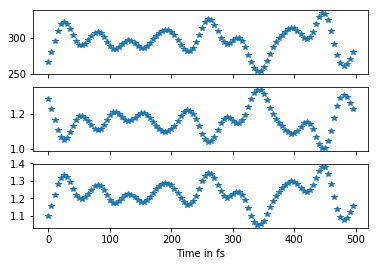

In [8]:
fig, axs = plt.subplots(nrows=3, sharex=True)
axs[0].plot(times, temperatures, '*')
axs[1].plot(times, e_pot, '*')
axs[2].plot(times, e_kin, '*')
axs[2].set_xlabel('Time in fs')

In [9]:
avg_temp = np.asarray(temperatures).mean()

Markdown(rf"## Average temperature: $\langle T \rangle$ = {avg_temp:.2f} K")

## Average temperature: $\langle T \rangle$ = 296.25 K

In [10]:
assert 200 < avg_temp < 300